In [85]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy
from scipy.optimize import curve_fit
import glob
import plotly.graph_objects as go
from astropy import table

In [2]:
galaxydata = '/Users/jasonvdv/Desktop/lsa-ast361/Work/jasonvdv/Lab8/galaxy-rotation-curves-lab-8/galaxyData/'

calibration_file = glob.glob(galaxydata + "cali*") 
calibration_file.sort()

galaxy_files = glob.glob(galaxydata + "gal*")
galaxy_files.sort()

galaxy_spectra = []
cal_spectra = []

In [3]:
for galaxyfile in galaxy_files: 
    
    with open(galaxyfile) as galaxy_data: 
        
        galaxyrows = []    
        
        for j, row in enumerate(galaxy_data, start=1): 
            if j%4 == 0: 
                galaxyrows.append(row) 
                
        galaxies = np.zeros(1024) #Create an array of 1024 0's.
        for row in galaxyrows: 
            temp_galaxy = row.split(' ') # Our rows are actually strings. To break them up, we use the split() command, which splits a string into a list by grabbing each segment separated by the delimiter you put in the parentheses (e.g. If you do 'abc def ghi'.split(' '), you'll get the list [abc,def,ghi])
            galaxy1 = [] # Create an empty list to hold the spectral data
            for val1 in temp_galaxy: # Iterate over the elements of your split list.
                if val1 != '' and val1 != '\n': # This excludes some "nonsense" cases where elements in your split list are empty strings or end-of-line characters
                    galaxy1.append(val1) #Throw the values that are actually fluxes into your spectrum array.
                    
                    
            galaxies1 = galaxies + np.float64(galaxy1) # Add the data from the current row to your total spectral data for this file.
            galaxies = np.array(galaxies1/len(galaxyrows))
        galaxy_spectra.append(galaxies)
# for x in galaxy_files:
#         print(x)


In [4]:
print(galaxy_spectra)
print(np.array(galaxy_spectra).shape)

[array([0.        , 0.        , 0.        , ..., 0.16252096, 0.16681818,
       0.16260804]), array([0.        , 0.        , 0.        , ..., 0.15882494, 0.15752635,
       0.15901582]), array([0.        , 0.        , 0.        , ..., 0.15299318, 0.15259189,
       0.15120257]), array([0.        , 0.        , 0.        , ..., 0.15854192, 0.15991284,
       0.16099329]), array([0.        , 0.        , 0.        , ..., 0.15906347, 0.16160977,
       0.15849528]), array([0.        , 0.        , 0.        , ..., 0.15957112, 0.16089136,
       0.15768065]), array([0.        , 0.        , 0.        , ..., 0.15964543, 0.16180707,
       0.16291144]), array([0.        , 0.        , 0.        , ..., 0.16377115, 0.16092052,
       0.1613685 ]), array([0.        , 0.        , 0.        , ..., 0.16166348, 0.16068731,
       0.16255369]), array([0.        , 0.        , 0.        , ..., 0.25401789, 0.25300884,
       0.24642108])]
(10, 1024)


In [5]:
for file in calibration_file: 
    
    with open(file) as calibration_data: 
        
        calrows = []    
        
        for j, row in enumerate(calibration_data, start=1): 
            if j%4 == 0: 
                calrows.append(row) 
                
        calibration = np.zeros(1024) #Create an array of 1024 0's.
        for row in calrows: 
            temp_cal = row.split(' ') # Our rows are actually strings. To break them up, we use the split() command, which splits a string into a list by grabbing each segment separated by the delimiter you put in the parentheses (e.g. If you do 'abc def ghi'.split(' '), you'll get the list [abc,def,ghi])
            cal_1 = [] # Create an empty list to hold the spectral data
            for val1 in temp_cal: # Iterate over the elements of your split list.
                if val1 != '' and val1 != '\n': # This excludes some "nonsense" cases where elements in your split list are empty strings or end-of-line characters
                    cal_1.append(val1) #Throw the values that are actually fluxes into your spectrum array.
                    
                    
            calibration = calibration + np.float64(cal_1) # Add the data from the current row to your total spectral data for this file.
            calibration = np.array(calibration/len(calrows))
        cal_spectra.append(calibration)

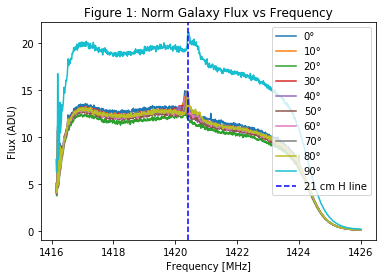

In [51]:
#galaxy Data
frequency = np.arange(1416,1426,0.009766)

for i in range(len(galaxy_spectra)):
    galaxy_spectra_range = galaxy_spectra[i][15:]
    plt.plot(frequency[15:],galaxy_spectra_range, label = (str(10*i) + '°'))
plt.title('Figure 1: Norm Galaxy Flux vs Frequency')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Flux (ADU)')
plt.axvline(1420.406, label = '21 cm H line', color = 'blue', linestyle = 'dashed')
plt.legend()

plt.show()

In [7]:
corrected_data = np.array([galaxy - cal_spectra[0] for galaxy in galaxy_spectra])
print((corrected_data).shape)
print(np.array(cal_spectra).shape)
print(np.array(galaxy_spectra).shape)

(10, 1024)
(1, 1024)
(10, 1024)


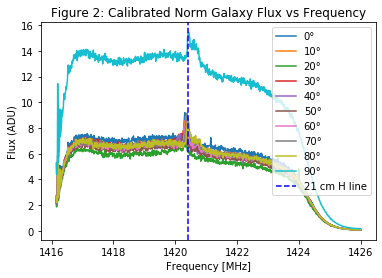

In [50]:
#calibrated frames
frequency = np.arange(1416,1426,0.009766)


label = ['Galaxy: ']
#galaxy Data
for i in range(len(corrected_data)):
    galaxy_spectra_range = corrected_data[i][15:]
    plt.plot(frequency[15:],galaxy_spectra_range, label = (str(10*i) + '°'))
plt.title('Figure 2: Calibrated Norm Galaxy Flux vs Frequency')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Flux (ADU)')
plt.axvline(1420.406, label = '21 cm H line', color = 'blue', linestyle = 'dashed')
plt.legend()
plt.show()

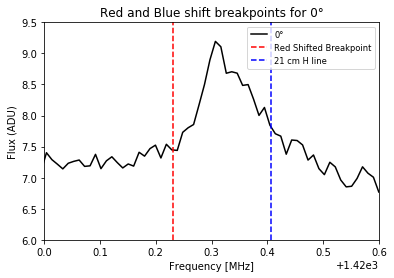

In [26]:
#zero degrees
plt.plot(frequency[15:],corrected_data[0][15:], label = '0°', color = 'black')
plt.xlim(1420,1420.6)
plt.ylim(6,9.5)
plt.axvline(1420.23, label = 'Red Shifted Breakpoint', color = 'r', linestyle = 'dashed')
plt.axvline(1420.406, label = '21 cm H line', color = 'blue', linestyle = 'dashed')
plt.title('Red and Blue shift breakpoints for 0°')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Flux (ADU)')
plt.legend(loc = 'best', fontsize = 'small')

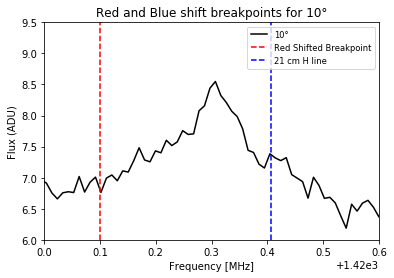

In [25]:
#10 degrees
plt.plot(frequency[15:],corrected_data[1][15:], label = '10°', color = 'black')
plt.xlim(1420,1420.6)
plt.ylim(6,9.5)
plt.axvline(1420.1, label = 'Red Shifted Breakpoint', color = 'r', linestyle = 'dashed')
plt.axvline(1420.406, label = '21 cm H line', color = 'blue', linestyle = 'dashed')
plt.title('Red and Blue shift breakpoints for 10°')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Flux (ADU)')
plt.legend(loc = 'best', fontsize = 'small')

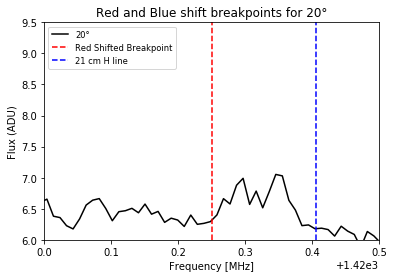

In [27]:
#20 degrees
plt.plot(frequency[15:],corrected_data[2][15:], label = '20°', color = 'black')
plt.xlim(1420,1420.5)
plt.ylim(6,9.5)
plt.axvline(1420.25, label = 'Red Shifted Breakpoint', color = 'r', linestyle = 'dashed')
plt.axvline(1420.406, label = '21 cm H line', color = 'blue', linestyle = 'dashed')
plt.title('Red and Blue shift breakpoints for 20°')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Flux (ADU)')
plt.legend(loc = 'best', fontsize = 'small')

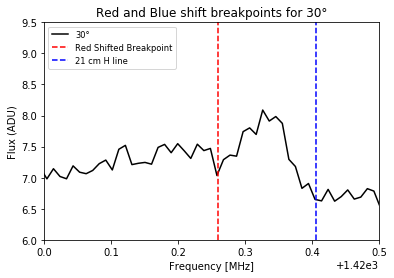

In [28]:
#30 degrees
plt.plot(frequency[15:],corrected_data[3][15:], label = '30°', color = 'black')
plt.xlim(1420,1420.5)
plt.ylim(6,9.5)
plt.axvline(1420.26, label = 'Red Shifted Breakpoint', color = 'r', linestyle = 'dashed')
plt.axvline(1420.406, label = '21 cm H line', color = 'blue', linestyle = 'dashed')
plt.title('Red and Blue shift breakpoints for 30°')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Flux (ADU)')
plt.legend(loc = 'best', fontsize = 'small')

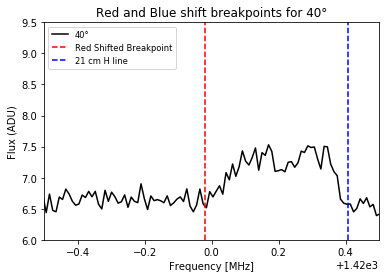

In [29]:
#40 degrees
plt.plot(frequency[15:],corrected_data[4][15:], label = '40°', color = 'black')
plt.xlim(1419.5,1420.5)
plt.ylim(6,9.5)
plt.axvline(1419.98, label = 'Red Shifted Breakpoint', color = 'r', linestyle = 'dashed')
plt.axvline(1420.406, label = '21 cm H line', color = 'blue', linestyle = 'dashed')
plt.title('Red and Blue shift breakpoints for 40°')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Flux (ADU)')
plt.legend(loc = 'best', fontsize = 'small')

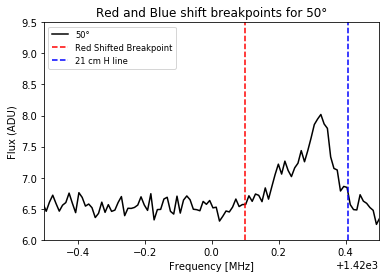

In [30]:
#50 degrees
plt.plot(frequency[15:],corrected_data[5][15:], label = '50°', color = 'black')
plt.xlim(1419.5,1420.5)
plt.ylim(6,9.5)
plt.axvline(1420.1, label = 'Red Shifted Breakpoint', color = 'r', linestyle = 'dashed')
plt.axvline(1420.406, label = '21 cm H line', color = 'blue', linestyle = 'dashed')
plt.title('Red and Blue shift breakpoints for 50°')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Flux (ADU)')
plt.legend(loc = 'best', fontsize = 'small')

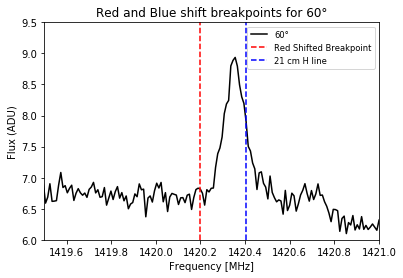

In [31]:
#60 degrees
plt.plot(frequency[15:],corrected_data[6][15:], label = '60°', color = 'black')
plt.xlim(1419.5,1421)
plt.ylim(6,9.5)
plt.axvline(1420.2, label = 'Red Shifted Breakpoint', color = 'r', linestyle = 'dashed')
plt.axvline(1420.406, label = '21 cm H line', color = 'blue', linestyle = 'dashed')
plt.title('Red and Blue shift breakpoints for 60°')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Flux (ADU)')
plt.legend(loc = 'best', fontsize = 'small')

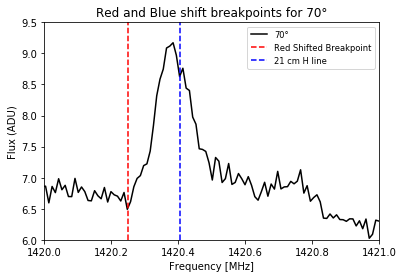

In [32]:
#70 degrees
plt.plot(frequency[15:],corrected_data[7][15:], label = '70°', color = 'black')
plt.xlim(1420,1421)
plt.ylim(6,9.5)
plt.axvline(1420.25, label = 'Red Shifted Breakpoint', color = 'r', linestyle = 'dashed')
plt.axvline(1420.406, label = '21 cm H line', color = 'blue', linestyle = 'dashed')
plt.title('Red and Blue shift breakpoints for 70°')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Flux (ADU)')
plt.legend(loc = 'best', fontsize = 'small')

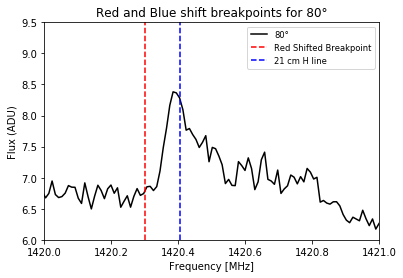

In [33]:
#80 degrees
plt.plot(frequency[15:],corrected_data[8][15:], label = '80°', color = 'black')
plt.xlim(1420,1421)
plt.ylim(6,9.5)
plt.axvline(1420.3, label = 'Red Shifted Breakpoint', color = 'r', linestyle = 'dashed')
plt.axvline(1420.406, label = '21 cm H line', color = 'blue', linestyle = 'dashed')
plt.title('Red and Blue shift breakpoints for 80°')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Flux (ADU)')
plt.legend(loc = 'best', fontsize = 'small')

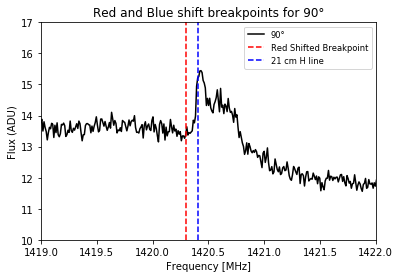

In [34]:
#90 degrees
plt.plot(frequency[15:],corrected_data[9][15:], label = '90°', color = 'black')
plt.xlim(1419,1422)
plt.ylim(10,17)
plt.axvline(1420.3, label = 'Red Shifted Breakpoint', color = 'r', linestyle = 'dashed')
plt.axvline(1420.406, label = '21 cm H line', color = 'blue', linestyle = 'dashed')
plt.title('Red and Blue shift breakpoints for 90°')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Flux (ADU)')
plt.legend(loc = 'best', fontsize = 'small')

In [79]:
# this code cell is for deriving the maximum outward velocity of HI clouds along the line of sight in the Sun's standard of rest
# and for converting this velocity to the tangential velocity of the HI clouds in the galactic standard of rest

R_0 = 2.5704e17 # distance from Sun to galactic center in km. this value is 8.33 kpc
c = 299792.458 # speed of light in km/s
f_actual = 1420.4057517652948 # exact frequency of rest 21 cm line in MHz

# velocity with respect to the local standard of rest for each galactic longitude measurement
vlsr_gal_00 = 10.48
vlsr_gal_10 = 9.86
vlsr_gal_20 = 8.96
vlsr_gal_30 = 7.77
vlsr_gal_40 = 6.33
vlsr_gal_50 = 4.7
vlsr_gal_60 = 2.93
vlsr_gal_70 = 1.07
vlsr_gal_80 = -0.82
vlsr_gal_90 = -2.68
vlsr_gpole = -25.71

# calculating the distance in km from the galactic center of the most redshifted HI cloud along the line of sight for each galactic longitude measurement
R_gal_00 = R_0*np.sin(0*(np.pi/180)) # zero!
R_gal_10 = R_0*np.sin(10*(np.pi/180)) 
R_gal_20 = R_0*np.sin(20*(np.pi/180)) 
R_gal_30 = R_0*np.sin(30*(np.pi/180)) 
R_gal_40 = R_0*np.sin(40*(np.pi/180)) 
R_gal_50 = R_0*np.sin(50*(np.pi/180)) 
R_gal_60 = R_0*np.sin(60*(np.pi/180)) 
R_gal_70 = R_0*np.sin(70*(np.pi/180)) 
R_gal_80 = R_0*np.sin(80*(np.pi/180)) 
R_gal_90 = R_0*np.sin(90*(np.pi/180))

# converting the above radius distances from km to kpc
R_gal_00_kpc = R_gal_00*3.24078e-17 # zero!
R_gal_10_kpc = R_gal_10*3.24078e-17
R_gal_20_kpc = R_gal_20*3.24078e-17
R_gal_30_kpc = R_gal_30*3.24078e-17
R_gal_40_kpc = R_gal_40*3.24078e-17
R_gal_50_kpc = R_gal_50*3.24078e-17
R_gal_60_kpc = R_gal_60*3.24078e-17
R_gal_70_kpc = R_gal_70*3.24078e-17
R_gal_80_kpc = R_gal_80*3.24078e-17
R_gal_90_kpc = R_gal_90*3.24078e-17

# observed frequency of the most redshifted HI cloud (most negative frequency) along the line of sight for each galactic longitude
f_gal_00 = 1420.23
f_gal_10 = 1420.1
f_gal_20 = 1420.25
f_gal_30 = 1420.26
f_gal_40 = 1419.98
f_gal_50 = 1419.5
f_gal_60 = 1420.2
f_gal_70 = 1420.25
f_gal_80 = 1420.3
f_gal_90 = 1420.3

# calculating observed velocity of HI cloud in the galactic standard of rest, along the line of sight
v_obs_gal_00 = (c*(1-(f_gal_00/f_actual)))+vlsr_gal_00
v_obs_gal_10 = (c*(1-(f_gal_10/f_actual)))+vlsr_gal_10
v_obs_gal_20 = (c*(1-(f_gal_20/f_actual)))+vlsr_gal_20
v_obs_gal_30 = (c*(1-(f_gal_30/f_actual)))+vlsr_gal_30
v_obs_gal_40 = (c*(1-(f_gal_40/f_actual)))+vlsr_gal_40
v_obs_gal_50 = (c*(1-(f_gal_50/f_actual)))+vlsr_gal_50
v_obs_gal_60 = (c*(1-(f_gal_60/f_actual)))+vlsr_gal_60
v_obs_gal_70 = (c*(1-(f_gal_70/f_actual)))+vlsr_gal_70
v_obs_gal_80 = (c*(1-(f_gal_80/f_actual)))+vlsr_gal_80
v_obs_gal_90 = (c*(1-(f_gal_90/f_actual)))+vlsr_gal_90

# calculating actual velocity of HI cloud, in the galactic standard of rest
v_gal_00 = v_obs_gal_00 + 220*np.sin(0*(np.pi/180))
v_gal_10 = v_obs_gal_10 + 220*np.sin(10*(np.pi/180))
v_gal_20 = v_obs_gal_20 + 220*np.sin(20*(np.pi/180))
v_gal_30 = v_obs_gal_30 + 220*np.sin(30*(np.pi/180))
v_gal_40 = v_obs_gal_40 + 220*np.sin(40*(np.pi/180))
v_gal_50 = v_obs_gal_50 + 220*np.sin(10*(np.pi/180))
v_gal_60 = v_obs_gal_60 + 220*np.sin(60*(np.pi/180))
v_gal_70 = v_obs_gal_70 + 220*np.sin(70*(np.pi/180))
v_gal_80 = v_obs_gal_80 + 220*np.sin(80*(np.pi/180))
v_gal_90 = v_obs_gal_90 + 220*np.sin(90*(np.pi/180))

# estimated error of the "most negative frequency" in MHz
sigma_f_gal_00 = 0.07
sigma_f_gal_10 = 0.08
sigma_f_gal_20 = 0.09
sigma_f_gal_30 = 0.04
sigma_f_gal_40 = 0.035
sigma_f_gal_50 = 0.03
sigma_f_gal_60 = 0.05
sigma_f_gal_70 = 0.02
sigma_f_gal_80 = 0.07
sigma_f_gal_90 = 0.02

# estimated error of the observed velocity of HI cloud in the local standard of rest
sigma_v_obs_gal_00 = (c/f_actual)*sigma_f_gal_00
sigma_v_obs_gal_10 = (c/f_actual)*sigma_f_gal_10
sigma_v_obs_gal_20 = (c/f_actual)*sigma_f_gal_20
sigma_v_obs_gal_30 = (c/f_actual)*sigma_f_gal_30
sigma_v_obs_gal_40 = (c/f_actual)*sigma_f_gal_40
sigma_v_obs_gal_50 = (c/f_actual)*sigma_f_gal_50
sigma_v_obs_gal_60 = (c/f_actual)*sigma_f_gal_60
sigma_v_obs_gal_70 = (c/f_actual)*sigma_f_gal_70
sigma_v_obs_gal_80 = (c/f_actual)*sigma_f_gal_80
sigma_v_obs_gal_90 = (c/f_actual)*sigma_f_gal_90

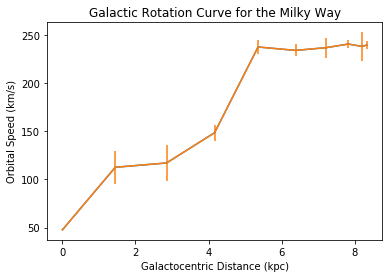

[47.57436803537806, 112.59491539258843, 117.07757675619659, 148.53253381913515, 237.60292730190724, 234.07159971777907, 236.88179108419743, 240.67552179744928, 238.15779386013048, 239.6400881974447]


In [101]:
velocity = [v_gal_00, v_gal_10,v_gal_20,v_gal_30,v_gal_40,v_gal_50,v_gal_60,v_gal_70,v_gal_80,v_gal_90]
radius = [R_gal_00_kpc,R_gal_10_kpc,R_gal_20_kpc,R_gal_30_kpc,R_gal_40_kpc,R_gal_50_kpc,R_gal_60_kpc,R_gal_70_kpc,R_gal_80_kpc,R_gal_90_kpc]

velocity_error = [sigma_f_gal_00,sigma_v_obs_gal_10,sigma_v_obs_gal_20,sigma_v_obs_gal_30,
                 sigma_v_obs_gal_40,sigma_v_obs_gal_50,sigma_v_obs_gal_60,sigma_v_obs_gal_70,
                 sigma_v_obs_gal_80,sigma_v_obs_gal_90]

plt.plot(radius,velocity)
plt.errorbar(radius,velocity,velocity_error)
plt.title('Galactic Rotation Curve for the Milky Way')
plt.xlabel('Galactocentric Distance (kpc)')
plt.ylabel('Orbital Speed (km/s)')
plt.show()

print(velocity)

Table of values

In [107]:
fig = go.Figure(data=[go.Table(header=dict(values=['Galactic Longitude (degrees)','Frequency [MHz]','Tangential Velocity [km/s]','Estimated Error (km/s)','Tangential Distance from GC [Kpc]']),
                 cells=dict(values=[[0,10,20,30,40,50,60,70,80,90],
                                    [1420.23,1420.1,1420.25,1420.26,1419.98,1419.5,1420.2,1420.25,1420.3,1420.3], 
                                    [47.5743,112.59, 117.077, 148.532, 237.602, 234.071, 236.881, 240.6755, 238.157, 239.640],
                                   [sigma_v_obs_gal_00,sigma_v_obs_gal_10,sigma_v_obs_gal_20,sigma_v_obs_gal_30,sigma_v_obs_gal_40,
                                   sigma_v_obs_gal_50,sigma_v_obs_gal_60,sigma_v_obs_gal_70,sigma_v_obs_gal_80,sigma_v_obs_gal_90],
                                   [R_gal_00_kpc,R_gal_10_kpc,R_gal_20_kpc,R_gal_30_kpc,R_gal_40_kpc,R_gal_50_kpc,R_gal_60_kpc,
                                   R_gal_70_kpc,R_gal_80_kpc,R_gal_90_kpc]]))])
fig.show()

# Abstract

It is valuable for astronomers to be able to discuss the distribution of mass within a galaxy. This can be determined by looking at a rotation curve for a galaxy, a plot of velocity versus distance to galactic center. For a long time, astronomers assumed that the rotation curve should show velocity increasing but then dropping off, as it was expected that there should be less and less mass toward the outer edges of the galaxy. On the contrary, the data shows that the curve flattens out, suggesting the presence of some kind of unexplained matter, now called "dark matter". The purpose of this experiment is to prove the existence of dark matter through observation of the 21 cm line and plotting a rotation curve for the Milky Way. To accomplish this, we plot spectra, determine tangential velocities of HI clouds and correct for local rest frame motion. Ultimately, we see that the resulting rotation curve does appear to flatten out, confirming the existence of dark matter.

# Introduction

Galaxy rotation curves show the variation in orbital velocities of stars or gas clouds at different radii. Therefore, astronomers can study the distribution of mass of a galaxy by looking at its rotation curve. Astronomers expected that most galaxies, such as the Milky Way, would have most of their mass concentrated at the center, since the amount of stars drops off with distance after a certain point. For this model (a galaxy with most mass at its center) one should expect to see a Keplerian relationship, such that velocity decreases with the square root of the radius.

Astronomers were able to actually plot galaxies' rotation curves by using radio astronomy. Doppler shifts of the 21 cm hydrogen line allow one to measure rotation velocities. By taking actual data for the Milky Way, astronomers saw an unexpected result. Vera Rubin was one of the first astronomers to provide reliable data showing galactic rotation curves that had a flat shape. This flat shape suggested the presence of some unseen matter, and Rubin showed that over 50% of a galaxy's mass was contained in some outer halo. This unseen halo is now called "dark matter", and remains a significant mystery to astronomers and physicists

# Theory

# 21 Centimeter Line¶

Neutral hydrogen gas penetrates dust clouds at a known frequency of about 1420 Hz. Further, neutral hydrogen atoms (HI) are high in abundance in low-density regions of the interstellar medium. These HI atoms are detectable because a photon of wavelength 21 cm is emitted when the relative spin changes from parallel to antiparallel. This happens as part of the process of transitioning between the two energy levels of the HI ground state. The unique nature of neutral hydrogen gas makes it incredibly useful, and the discovery of the 21 cm line allowed for the development of spectral line radio astronomy!

# Doppler Shifts¶

In spectral line radio astronomy, we are able to determine velocities by examining the doppler shifts of frequences on a spectrum. Doppler shifts occur when an object is moving towards or away from an observer, as a result of the doppler effect. These shifts are simply changes in frequency, and one can imagine it by thinking about the increase in frequency of an ambulence's siren as it approaches. Similarly, if an astronomical object is moving toward an observer (ie it has some line of sight velocity), it will have some lines shifted to shorter wavelengths, displaying a "blueshift". A redshift occurs when the object is moving away from the observer, and its spectral lines are shifted to longer wavelengths. Generally, velocity and frequency are related by the followiing equation:

$$ f' = f_a(\frac{v + v_o}{v - v_s}) \quad (1)$$
Where $f'$ is the observed frequency, $f_a$ is the known frequency at which the spectral line should occur, $v$ is the speed of the wave, $v_o$ is the velocity of the observer, and $v_s$ is the velocity of the source. This equation can also be rewritten in the following form when discussing electromagnetic waves:

$$ f' = f_a(1-\frac{v_s}{c}) \quad (2) $$
In equation 2, $c$ is the speed of light.

# Calculating Velocities of HI Clouds¶



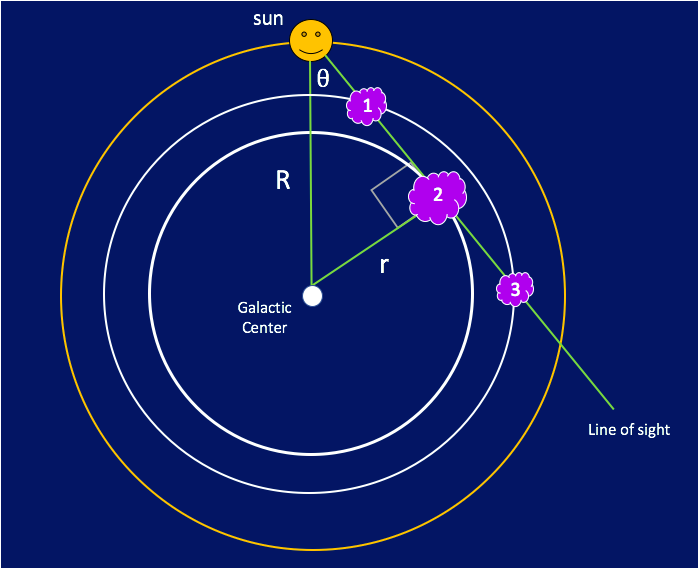

In [121]:
import IPython.display
from IPython.display import Image
Image(filename = '/Users/jasonvdv/Downloads/Screen Shot 2019-12-04 at 12.54.55 PM.png')

Figure 1. Illustration of galactic plane geometry, assuming a simple axisymmetric model.

In the above image, we see the Sun and three different HI gas clouds orbiting the galactic center. Capital R represents the distance from the Sun to the galactic center, a known value of 8.3 Kpc. Lower case r represents the distance from the gas cloud in question to the galactic center. We can see that the gas cloud with the most redshifted velocity will be the one moving along our line of sight (the cloud whose orbit is tangent to the line of sight), as this cloud will have the greatest line of sight velocity. In figure 1, the cloud with the greatest redshift velocity is cloud 2, while clouds 1 and 3 will have much smaller LOS velocities.

We can utilize spectral line radio astronomy to find the line of sight velocity of the cloud, this can also be denoted as the "redshifted velocity". Note that this observed velocity does not account for the local motion of earth (or the observer). To correct for the local standard of rest motion, we add a known velocity $v_{LSR}$ that comes from the header of the data in a radio measurement. This is simply done as following:

$$ v_{obs, LSR} = v_{obs} + v_{LSR} \quad (3) $$
From this point, one can determine the actual orbital velocity of the cloud, by utilizing a simplified geometry of the galactic plane. An illustration of this geometry is displayed below:

In the above image, we see the Sun and three different HI gas clouds orbiting the galactic center. Capital R represents the distance from the Sun to the galactic center, a known value of 8.3 Kpc. Lower case r represents the distance from the gas cloud in question to the galactic center. We can see that the gas cloud with the most redshifted velocity will be the one moving along our line of sight (the cloud whose orbit is tangent to the line of sight), as this cloud will have the greatest line of sight velocity. In figure 1, the cloud with the greatest redshift velocity is cloud 2, while clouds 1 and 3 will have much smaller LOS velocities.

Assuming that the angular velocity of the clouds decreases monotonically with radius, we can find the following relation between redshift velocity, $v_{obs, LSR}$, and orbital velocity:

$$ v_{obs, LSR} = R[v_{orbital} \frac{sin(\theta)}{r} - v_{Sun} \frac{sin(\theta)}{R}] \quad (4)$$
In the above equation, $v_{Sun}$ is the velocity of the sun, relative to the galactic center. This term accounts further for our own motion around the galaxy. It is known that the value of $v_{Sun}$ is 220 km/s. This equation can be solved to give us the desired $v_orbital$ of the HI clouds. This is the velocity value that can be plotted against distance from the galactic center in order to obtain a galatic rotation curve.

$$ v_{orbital} = \frac{r}{R}(\frac{v_{obs,LSR}}{sin(\theta)} + v_{Sun}) \quad (5) $$
Referring to Figure 1, we see that $sin(\theta)$ is equal to $\frac{r}{R}$. We can therefore substitute this into equation 5 to derive the following relation:

$$ v_{orbital} = v_{obs, LSR} + v_{Sun}sin(\theta) \quad (6) $$
Equation 6 can ultimately be used to find the orbital velocity of the most redshifted HI clouds along the line of sight at any angle on the galactic plane.

# Rotation Curve and Enclosed Mass¶

We understand that for spherical geometry, gravitational force is related to enclosed mass as such:

$$ F = \frac{GM(r)m}{r^2} \quad (7)$$
From this equation, we derive the following relationship bewteen velocity and enclosed mass:

$$v(r) = \sqrt{\frac{GM(r)}{r}} \quad(8)$$
We can solve equation 8 for mass in order to get the enclosed mass within a certain radius:

$$ M(r) = \frac{v^2r}{G} \quad(9)$$
For this relationship, velocity is proportional to $\frac{1}{\sqrt{r}}$. This type of relationship is known as a Keplerian model, and follows the assumption of Gauss's Law- that all of the mass enclosed can be treated as a point mass at the center. Therefore, if we saw a Keplerian decline on a galactic rotation curve, it would tell us that most of the mass was at the center of the galaxy. This model was the expectation for mass distribution in galaxies for a very long time.

Consider the case of a galaxy containing equal mass at all points- a "solid body" rotation. For this model, we would see a straight line on the rotation curve, as velocity would be proportional to radius. Say, however that a galaxy actually had mass increasing linearly with radius. This relationship would produce a characteristically flat rotation curve, where the curve appears to "flatten out" with increasing radius.

The flat curve model is actually what is observed for most galaxies. This result suggests that most galaxies have increasing mass with radius. We do not observe an icrease in luminosity with radius, so there must be an unseen form of matter that produces that flat rotation curves we see so consistently, and is referred to as Dark Matter.

# Enclosed Mass¶

We can estimate the enclosed mass using equation 9. For this calculation, we use a radius of 2.56e17 km and an orbital velocity value of 255 km/s. These are the values we found for the outer orbital radius, or a 90 degree angle on the galactic plane. Converted to meters to match the units of the gravitational constant ($6.674x10^{-11} m^3kg^{-1}s^{-2}$), these values are r = 2.56e20 meters and v = 255000 m/s.

$$ M(r) = \frac{v^2r}{G} $$$$ M = \frac{(255000)^2(2.56x10^{20})}{6.674x10^{-11}} $$$$ M = 2.495x10^{41} kg \quad = 1.254x10^{11}M_{sun} $$
This mass value is along the same order of magnitude as the values found by Xin and Zheng in their 2013 paper. We see that our rotation curve is not consistent with the distribution of stars in the galaxy. Luminous matter drops off with radius, as a keplerian decline. However we see that the mass increases linearly with radius. The conclusion of this conundrum is that there must exist some halo of non-luminous matter, known as Dark Matter. These results are confirmed by many studies, including the 2013 publication by Xin and Zheng.

# Methodology

  We begin by reading in the data given to us from bitbucket. We read this data in very similar to last lab. Once we do this, we will have data taken from 0-90 degrees in longitude on the galactic plane. We use these data to plot the frequency from 1416-1426 Mhz against the flux for various longitudinal values.  

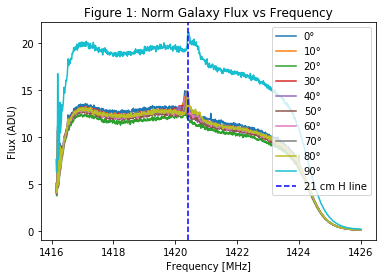

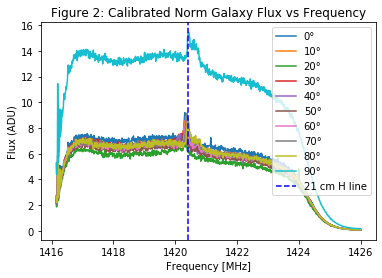

In [128]:
#galaxy Data
frequency = np.arange(1416,1426,0.009766)

for i in range(len(galaxy_spectra)):
    galaxy_spectra_range = galaxy_spectra[i][15:]
    plt.plot(frequency[15:],galaxy_spectra_range, label = (str(10*i) + '°'))
plt.title('Figure 1: Norm Galaxy Flux vs Frequency')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Flux (ADU)')
plt.axvline(1420.406, label = '21 cm H line', color = 'blue', linestyle = 'dashed')
plt.legend()

plt.show()
corrected_data = np.array([galaxy - cal_spectra[0] for galaxy in galaxy_spectra])
frequency = np.arange(1416,1426,0.009766)
label = ['Galaxy: ']
#galaxy Data
for i in range(len(corrected_data)):
    galaxy_spectra_range = corrected_data[i][15:]
    plt.plot(frequency[15:],galaxy_spectra_range, label = (str(10*i) + '°'))
plt.title('Figure 2: Calibrated Norm Galaxy Flux vs Frequency')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Flux (ADU)')
plt.axvline(1420.406, label = '21 cm H line', color = 'blue', linestyle = 'dashed')
plt.legend()
plt.show()

The first plot above shows the measurement of the galactic pole, which is used as a background measurement to be subtracted from each galactic longitude measurement. The second plot shows the spectra of each galactic plane measurement after subtracting the galactic pole background measurement. Since the relative flux is negative at some frequencies, this means that the galactic pole spectrum has more flux than the galactic plane data at these frequencies where the relative flux is negative. This is because the measurement of the galactic pole was very close to the ground, about 5 to 10 degrees above the horizontal limit of the SRT. So, it is very likely that the SRT picked up ground emission from the environment, such as the roof or nearby buildings. Because of this spillover radiation, the feedhorn collected more flux during the galactic pole measurement, and so this caused a negative relative flux in these calibrated spectra. The rest frequency of the 21-cm line is indicated by the vertical black line. We can clearly see the Doppler shift in the 21-cm line in each galactic longitude spectra, indicating that there are HI clouds moving towards and away from us along the line of sight. In the next section, we will find the "maximum negative frequency" of the 21-cm line for each spectrum, and we will use this frequency to find the velocity of the HI cloud in the rest frame of the galaxy (notably not the Sun's local standard of rest). We use these plots to get after a spectra for each of the longitudes seperating by variance from the H 21 cm line. 
    We continue our inspection by plotting the individual spectra for each longitude as mentioned. The plots are displayed here:

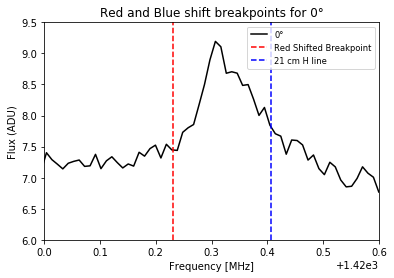

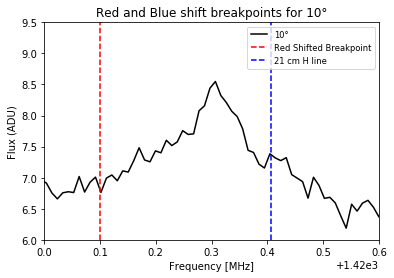

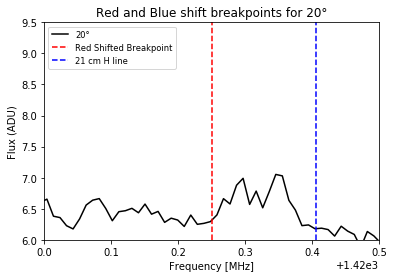

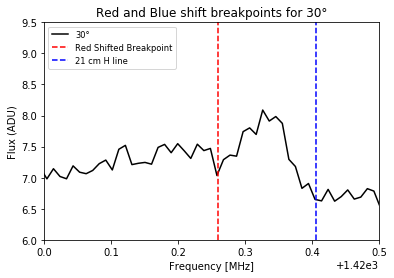

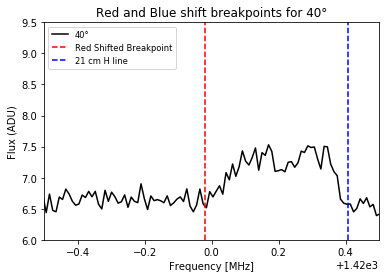

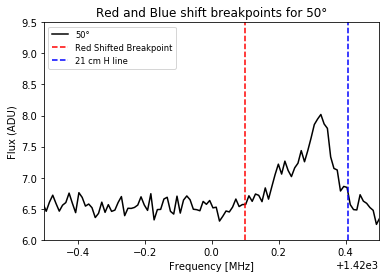

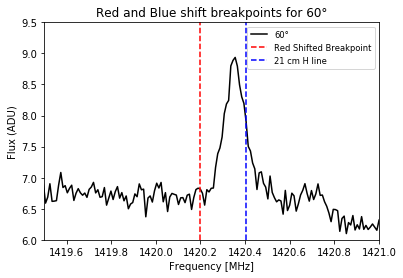

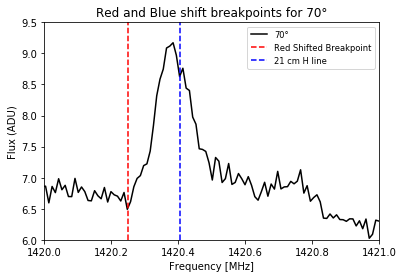

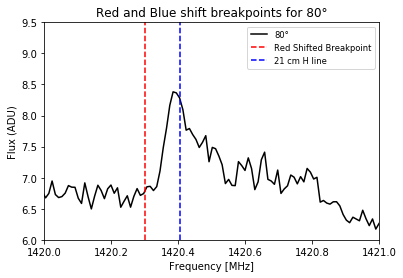

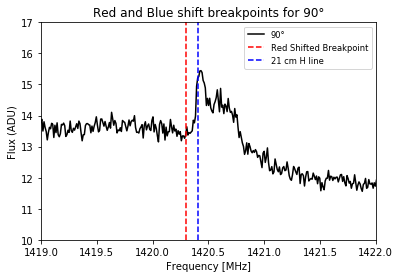

In [134]:
plt.plot(frequency[15:],corrected_data[0][15:], label = '0°', color = 'black')
plt.xlim(1420,1420.6)
plt.ylim(6,9.5)
plt.axvline(1420.23, label = 'Red Shifted Breakpoint', color = 'r', linestyle = 'dashed')
plt.axvline(1420.406, label = '21 cm H line', color = 'blue', linestyle = 'dashed')
plt.title('Red and Blue shift breakpoints for 0°')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Flux (ADU)')
plt.legend(loc = 'best', fontsize = 'small')
plt.show()

#10 degrees
plt.plot(frequency[15:],corrected_data[1][15:], label = '10°', color = 'black')
plt.xlim(1420,1420.6)
plt.ylim(6,9.5)
plt.axvline(1420.1, label = 'Red Shifted Breakpoint', color = 'r', linestyle = 'dashed')
plt.axvline(1420.406, label = '21 cm H line', color = 'blue', linestyle = 'dashed')
plt.title('Red and Blue shift breakpoints for 10°')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Flux (ADU)')
plt.legend(loc = 'best', fontsize = 'small')
plt.show()

#20 degrees
plt.plot(frequency[15:],corrected_data[2][15:], label = '20°', color = 'black')
plt.xlim(1420,1420.5)
plt.ylim(6,9.5)
plt.axvline(1420.25, label = 'Red Shifted Breakpoint', color = 'r', linestyle = 'dashed')
plt.axvline(1420.406, label = '21 cm H line', color = 'blue', linestyle = 'dashed')
plt.title('Red and Blue shift breakpoints for 20°')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Flux (ADU)')
plt.legend(loc = 'best', fontsize = 'small')
plt.show()
#30 degrees
plt.plot(frequency[15:],corrected_data[3][15:], label = '30°', color = 'black')
plt.xlim(1420,1420.5)
plt.ylim(6,9.5)
plt.axvline(1420.26, label = 'Red Shifted Breakpoint', color = 'r', linestyle = 'dashed')
plt.axvline(1420.406, label = '21 cm H line', color = 'blue', linestyle = 'dashed')
plt.title('Red and Blue shift breakpoints for 30°')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Flux (ADU)')
plt.legend(loc = 'best', fontsize = 'small')
plt.show()
#40 degrees
plt.plot(frequency[15:],corrected_data[4][15:], label = '40°', color = 'black')
plt.xlim(1419.5,1420.5)
plt.ylim(6,9.5)
plt.axvline(1419.98, label = 'Red Shifted Breakpoint', color = 'r', linestyle = 'dashed')
plt.axvline(1420.406, label = '21 cm H line', color = 'blue', linestyle = 'dashed')
plt.title('Red and Blue shift breakpoints for 40°')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Flux (ADU)')
plt.legend(loc = 'best', fontsize = 'small')
plt.show()
#50 degrees
plt.plot(frequency[15:],corrected_data[5][15:], label = '50°', color = 'black')
plt.xlim(1419.5,1420.5)
plt.ylim(6,9.5)
plt.axvline(1420.1, label = 'Red Shifted Breakpoint', color = 'r', linestyle = 'dashed')
plt.axvline(1420.406, label = '21 cm H line', color = 'blue', linestyle = 'dashed')
plt.title('Red and Blue shift breakpoints for 50°')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Flux (ADU)')
plt.legend(loc = 'best', fontsize = 'small')
plt.show()
#60 degrees
plt.plot(frequency[15:],corrected_data[6][15:], label = '60°', color = 'black')
plt.xlim(1419.5,1421)
plt.ylim(6,9.5)
plt.axvline(1420.2, label = 'Red Shifted Breakpoint', color = 'r', linestyle = 'dashed')
plt.axvline(1420.406, label = '21 cm H line', color = 'blue', linestyle = 'dashed')
plt.title('Red and Blue shift breakpoints for 60°')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Flux (ADU)')
plt.legend(loc = 'best', fontsize = 'small')
plt.show()
#70 degrees
plt.plot(frequency[15:],corrected_data[7][15:], label = '70°', color = 'black')
plt.xlim(1420,1421)
plt.ylim(6,9.5)
plt.axvline(1420.25, label = 'Red Shifted Breakpoint', color = 'r', linestyle = 'dashed')
plt.axvline(1420.406, label = '21 cm H line', color = 'blue', linestyle = 'dashed')
plt.title('Red and Blue shift breakpoints for 70°')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Flux (ADU)')
plt.legend(loc = 'best', fontsize = 'small')
plt.show()
plt.plot(frequency[15:],corrected_data[8][15:], label = '80°', color = 'black')
plt.xlim(1420,1421)
plt.ylim(6,9.5)
plt.axvline(1420.3, label = 'Red Shifted Breakpoint', color = 'r', linestyle = 'dashed')
plt.axvline(1420.406, label = '21 cm H line', color = 'blue', linestyle = 'dashed')
plt.title('Red and Blue shift breakpoints for 80°')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Flux (ADU)')
plt.legend(loc = 'best', fontsize = 'small')
plt.show()
#90 degrees
plt.plot(frequency[15:],corrected_data[9][15:], label = '90°', color = 'black')
plt.xlim(1419,1422)
plt.ylim(10,17)
plt.axvline(1420.3, label = 'Red Shifted Breakpoint', color = 'r', linestyle = 'dashed')
plt.axvline(1420.406, label = '21 cm H line', color = 'blue', linestyle = 'dashed')
plt.title('Red and Blue shift breakpoints for 90°')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Flux (ADU)')
plt.legend(loc = 'best', fontsize = 'small')

The above plots show the emission spectra for each galactic longitude measurement with the galactic pole background spectra subtracted. The vertical blue line in each plot indicates the rest frequency of the 21 cm line from neutral Hydrogren. The vertical red line in each plot indicates the frequency that corresponds to the HI cloud along the line of sight that has the greatest velocity (i.e. the "most negative frequency"). 

We are using the "most negative frequency" to find the velocity of HI clouds because this is the frequency corresponding to the most redshifted HI cloud. Remember that when an object is redshifted with respect to us, this means that the light that reaches us has a greater wavelength and lower frequency. Thus we look to where the 21-cm line is Dopper shifted to the lowest frequency, to find the HI cloud with the greatest tangential velocity along our line of sight. We want to find the HI cloud with the greatest tangential velocity because we are able to calculate its radial distance from the galactic center using basic trigonometry outlined in the Theory section. When we perform these calculations we are assuming (1) that the orbital speed from the galactic center monotionically decreases and that (2) the orbits are circular. We now have all we need to construct the galaxy rotation curve by simply calculating the maximum velocity of the clouds along the line of sight of the sun's frame. We use the velocity given to us as vlsr and we find the distance from the galactic center with simple trigonometry ie R_0*sin(longitude) = R. We recognize our conversion into radians and we arrive at a radial distance. We convert the distance into Kpc for convenience and then use the observed frequencies of the redshifts. We take the vlsr data and add that to the doppler shift velocity to get the observed velocities. We finally add the velocity of the sun using trig once again to these quantities (v_obs) and are left with the actua velocity of the HI coud in the galactic standard. We also care about the error in our measurements, so we use sigma times the doppler velocities to get error measurements for each readout. These are overplotted onto the data points of the below graph:

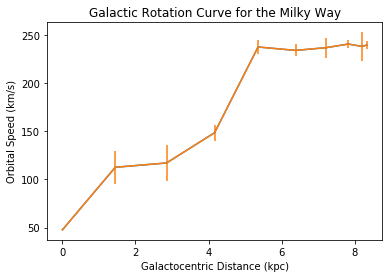

In [135]:
plt.plot(radius,velocity)
plt.errorbar(radius,velocity,velocity_error)
plt.title('Galactic Rotation Curve for the Milky Way')
plt.xlabel('Galactocentric Distance (kpc)')
plt.ylabel('Orbital Speed (km/s)')
plt.show()

In [138]:
fig = go.Figure(data=[go.Table(header=dict(values=['Galactic Longitude (degrees)','Frequency [MHz]','Tangential Velocity [km/s]','Estimated Error (km/s)','Tangential Distance from GC [Kpc]']),
                 cells=dict(values=[[0,10,20,30,40,50,60,70,80,90],
                                    [1420.23,1420.1,1420.25,1420.26,1419.98,1419.5,1420.2,1420.25,1420.3,1420.3], 
                                    [47.5743,112.59, 117.077, 148.532, 237.602, 234.071, 236.881, 240.6755, 238.157, 239.640],
                                   [sigma_v_obs_gal_00,sigma_v_obs_gal_10,sigma_v_obs_gal_20,sigma_v_obs_gal_30,sigma_v_obs_gal_40,
                                   sigma_v_obs_gal_50,sigma_v_obs_gal_60,sigma_v_obs_gal_70,sigma_v_obs_gal_80,sigma_v_obs_gal_90],
                                   [R_gal_00_kpc,R_gal_10_kpc,R_gal_20_kpc,R_gal_30_kpc,R_gal_40_kpc,R_gal_50_kpc,R_gal_60_kpc,
                                   R_gal_70_kpc,R_gal_80_kpc,R_gal_90_kpc]]))])
fig.show()

The above plot shows the calculated tangential speed of HI clouds in the galactic standard of rest versus the calculated radial distance from the galactic center (GC) of the HI cloud. Thus, the above plot represents the galactic rotation curve of the Milky Way. We see that at galactocentric distances greater than about 5 kpc the rotation curve begins to flatten. This shows that even as the distance from the GC increases, the tangential velocity stays relatively constant. This is clearly not a Keplerian curve, which assumes the mass in the galaxy is dominated by a point mass in the center. It is also not what we would expect from solid-body rotation, in which we would see the velocity to increase linearly with distance from the center. We also observe the table constructed using the quantities we derived above and were given in the galaxy data. We show the frequency, tangential velocity, error, and distance measurements for each. These data show us the pattern found in the galaxy rotation curve graph. 

From what we discussed in the Theory section, this rotation curve shows that there must be some excess matter in the galaxy that we cannot see, specifically there must be excess matter in the galactic disk. This excess matter is necessary for this constant orbital speed at increasing galactocentric distances to be possible. This excess matter has been called "dark matter," since it does not interact with the electromagnetic force.

# Summary¶

With the goal of plotting a rotation curve for the milky way, we take data in the radio band for the hydrogen 21 cm line at different positions, from zero to ninety degrees, on the galactic plane. We use this data to plot spectra at each position.

We are able to estimate the frequency of the most negative tangential velocity for each position on the galactic plane, from zero to ninety degrees. These frequencies correspond with a maximum 21 cm redshift velocity, which we use to determine the velocity of an HI cloud moving tangent to our line of sight. We correct these velocities by accounting for the local standard of rest, and then perform a calculation using equations 5 & 6 to find the velocity of the cloud with respect to the galactic center. These are the velocities that we correct to account for the Sun's motion, and then plot to show a galactic rotation curve.

Our rotation curve generally flattens out with increasing distance from the galactic center. This flat shape is the indicator of the presence of dark matter, as discussed in the introduction. We note that some of measurements may have quite a bit of error, due to the qualitative nature of estimating the frequencies. That being said, the flat shape tends to hold true within our error bars, and we can generally disregard the last data point, which appears to be somewhat of an outlier.

# Conclusion¶

Ultimately, we conclude that the rotation curve of the Milky Way is consistent with the theory of dark matter, as it has a definitively flat shape. By examining the redshift of the radio 21 cm line for hydrogen, we are able to determine relatively accurate orbital velocities of HI clouds. These velocities produce the rotation curve with a flat shape, rather than a keplerian decline. Since this mass distribution disagrees with the distribution of stars in the Milky Way, we conclude that our result confirms that there is an unseen "halo" of matter toward the outer edges of the Milky Way.